# Reading data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle

from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score

In [2]:
data = pd.read_csv("../data/Emotion_Data_v2.csv")

In [3]:
emotions = {'neutral': 0,
            'calm': 1,
            'happy': 2, 
            'sad': 3, 
            'angry': 4, 
            'fearful': 5, 
            'disgust': 6,
            'surprised': 7, 
            'boredom': 8}
data["Emotion"] = data["Emotion"].map(emotions)
names = data["File Name"]
data = data.drop("File Name", axis = 1)
data

,Emotion,Chroma Standard Deviation,Croma Mean,MEL Standard Deviation,MEL Mean,Spectral Centroid Feature,MFCC Standard Deviation,MFCC Mean,MFCC 1st Derivative,MFCC 2nd Derivative,Root Mean Square Mean,Spectral Rolloff Mean,Spectral Rolloff Range,Zero Crossing Rate
0,2,0.251560,0.611641,10.345727,1.482626,1851.787049,95.586288,-14.091299,0.045822,-0.102562,0.064489,327.987448,2691.650391,327.987448
1,0,0.235453,0.638080,23.354847,3.512083,1386.832519,96.253471,-9.005164,-0.040387,-0.095998,0.099006,277.470703,2777.783203,277.470703
2,4,0.244518,0.609958,23.899830,3.042638,2138.843511,83.991272,-17.577866,0.127689,-0.089570,0.101291,481.971571,2670.117188,481.971571
3,2,0.284806,0.528645,33.872307,3.438237,2073.102010,84.644112,-17.824776,-0.116098,-0.096451,0.098398,306.538759,2002.587891,306.538759
4,0,0.224481,0.658214,39.342068,5.511982,1481.499672,91.639870,-8.317816,-0.101314,-0.093935,0.126057,169.360352,1668.823242,169.360352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9891,7,0.332678,0.575813,0.364735,0.036160,2347.294889,167.522430,-51.517506,0.000119,-0.000630,0.007563,457.910156,4188.208008,457.910156
9892,7,0.325352,0.600506,0.889120,0.086041,2271.545838,156.242050,-45.163898,-0.000215,-0.000014,0.011557,429.840734,1733.422852,429.840734
9893,7,0.336933,0.577079,0.594145,0.058880,2275.967828,158.319168,-46.462028,-0.000471,-0.000133,0.009970,430.476273,1485.791016,430.476273
9894,7,0.310050,0.576939,0.937817,0.086885,2393.131729,147.918533,-40.915497,-0.001676,0.001688,0.013326,592.366229,6018.530273,592.366229


In [4]:
y = data["Emotion"]
data = data.drop("Emotion", axis = 1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.3)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6927, 13), (2969, 13), (6927,), (2969,))

## Random Forest

In [7]:
rf = RandomForestClassifier(oob_score = True, n_jobs = -1, random_state = 11, \
                            max_depth = 31, verbose = 3)

In [8]:
rf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100

building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100building tree 10 of 100

building tree 11 of 100
building tree 12 of 100building tree 13 of 100
building tree 14 of 100building tree 15 of 100


building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100building tree 21 of 100

building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100building tree 28 of 100

building tree 29 of 100


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.3s


building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100building tree 35 of 100

building tree 36 of 100building tree 37 of 100

building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100building tree 46 of 100

building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100building tree 58 of 100

building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100building tree 66 of 100

building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.1s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=31, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=11, verbose=3,
                       warm_start=False)

In [9]:
accuracy_score(rf.predict(X_test), y_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


0.42707982485685414

In [10]:
coefs = pd.DataFrame({"feature": X_train.columns,
             "coef": rf.feature_importances_}).sort_values(by = "coef", ascending = False)
coefs

,feature,coef
3,MEL Mean,0.091694
6,MFCC Mean,0.090287
5,MFCC Standard Deviation,0.084959
9,Root Mean Square Mean,0.081192
2,MEL Standard Deviation,0.079857
0,Chroma Standard Deviation,0.075689
11,Spectral Rolloff Range,0.075421
4,Spectral Centroid Feature,0.073976
12,Zero Crossing Rate,0.073743
10,Spectral Rolloff Mean,0.072961


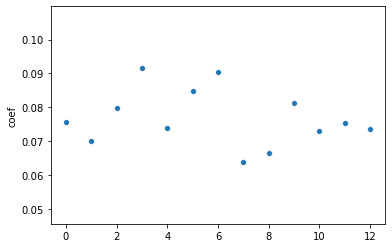

In [11]:
sns.scatterplot(x = coefs.index, y = coefs["coef"]);

## Logistic Regression

In [12]:
logit = LogisticRegression(random_state = 11, verbose = 3, n_jobs = -1)

NameError: name 'LogisticRegression' is not defined

In [ ]:
logit.fit(X_train, y_train)

In [ ]:
accuracy_score(logit.predict(X_test), y_test)

In [ ]:
coefs = pd.DataFrame({"feature": X_train.columns,
             "coef": logit.coef_[0]}).sort_values(by = "coef", ascending = False)
coefs

In [ ]:
sns.scatterplot(x = coefs.index, y = coefs["coef"]);